# Напишите заголовок проекта здесь

- Автор: Коваленко Николай Евгеньевич 
- Дата: 12.01.2025

### Цели и задачи проекта

<font color='#777778'>Провести исследовательский анализ рынка общественного питания города Москвы с целью предоставления рекоммендаций для инвестиционного фонда Shut Up and Take My Money по открытию бара/кафе/ресторана.</font>


### Описание данных

<font color='#777778'>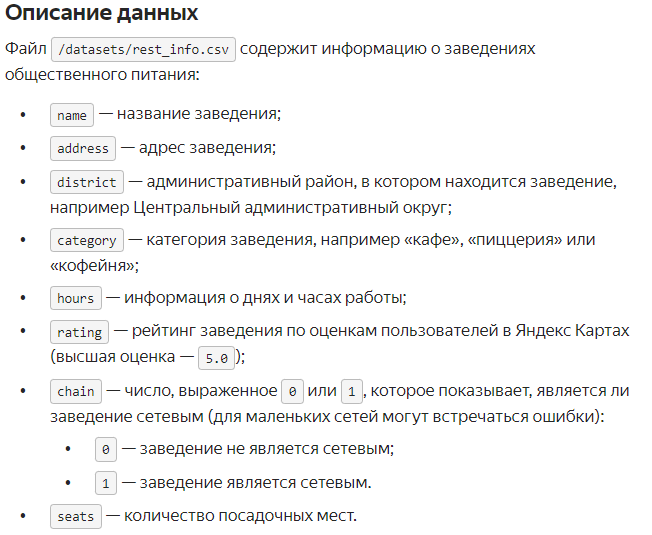 <br>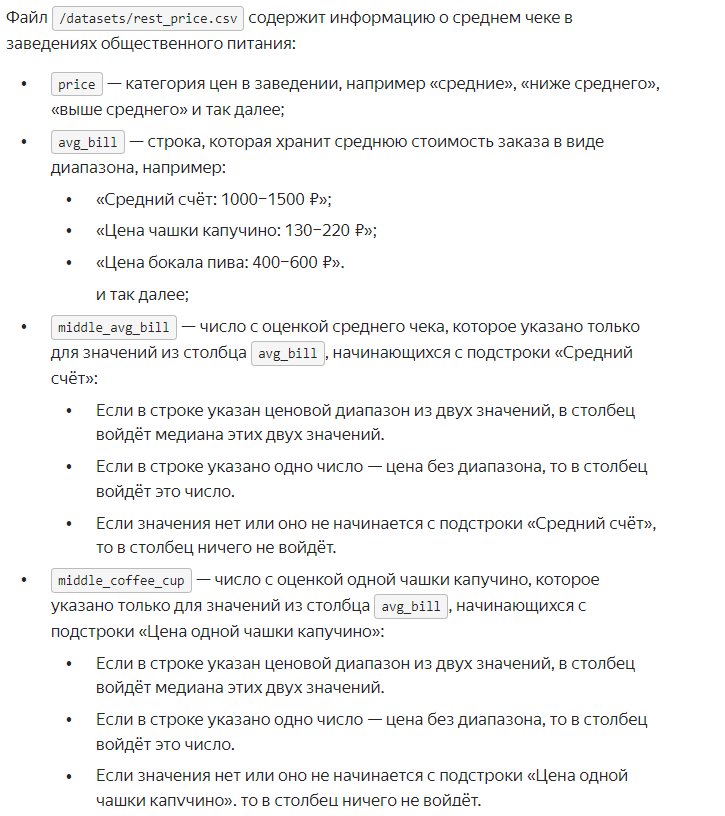</font>

### Содержимое проекта

<font color='#777778'>1 Загрузка данных и знакомство с ними <br> 
2 Предобработка данных <br>
3 Исследовательский анализ данных <br>
4 Итоговый вывод и рекомендации</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [48]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [49]:
# Используйте ячейки типа Code для вашего кода

In [50]:
# При необходимости добавьте новые ячейки для кода или удалите пустые

- Познакомьтесь с данными и изучите общую информацию о них.

In [52]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix


In [54]:
df_rest=pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [55]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [56]:
df_price=pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [57]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

В датафрейме df_rest 8405 записей в 9 столбцах. В столбцах hours и seats есть NULL значения, в остальных все заполнено.

В датафрейме df_price 4057 записей в 5 столбцах. Во всех столбцах кроме id есть NULL значения.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [62]:
df_rest_full=df_rest.merge(df_price, on='id', how='left')

In [63]:
df_rest_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


In [64]:
df_rest_full.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

Просмотрев типы данных пришли к выводу, что они отражены корректно.

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [68]:
# Подсчитываем долю строк с пропусками
df_rest_full.isna().sum() / df_rest_full.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

In [69]:
df_rest_full['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [70]:
df_rest_full[['hours', 'price', 'avg_bill']]=df_rest_full[['hours', 'price', 'avg_bill']].fillna('no_available')
df_rest_full[['seats', 'middle_avg_bill', 'middle_coffee_cup']]=df_rest_full[['seats', 'middle_avg_bill', 'middle_coffee_cup']].fillna(-1)

In [71]:
df_temp=df_rest_full.copy()

In [72]:
df_temp.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,no_available,no_available,-1.0,-1.0
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,no_available,Цена чашки капучино:155–185 ₽,-1.0,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0


In [73]:
#Проверяем уникальность айди заведений общественного питания:
unique_name = df_temp['name'].nunique()
total_rows = len(df_temp)
print(f'Уникальные id: {unique_name}, Всего строк: {total_rows}')

Уникальные id: 5614, Всего строк: 8406


In [74]:
# Приводим все значения столбца name (название заведения) к нижнему регистру:
df_temp['name'] = df_temp['name'].str.lower()
#Если в названиях есть лишние пробелы в начале или конце строки, удалим их: 
df_temp['name'] = df_temp['name'].str.strip() 
# Убираем точки из строки:
df_temp['name'] = df_temp['name'].str.replace('.', '', regex=False)
unique_new_name = df_temp['name'].nunique()
total_rows = len(df_temp)
print(f'Уникальные id: {unique_new_name}, Всего строк: {total_rows}')

Уникальные id: 5511, Всего строк: 8406


In [75]:
df_made = df_temp.copy()
df_made.loc[(df_made[['name','address']].duplicated(keep=False))]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,no_available,no_available,-1.0,-1.0
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,no_available,no_available,-1.0,-1.0
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,no_available,no_available,-1.0,-1.0
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,no_available,no_available,-1.0,-1.0
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,no_available,no_available,-1.0,-1.0
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,no_available,4.1,0,276.0,no_available,no_available,-1.0,-1.0


In [76]:
unique_id = df_made['id'].nunique()
total_rows = len(df_made)
print(f'Уникальные id: {unique_id}, Всего строк: {total_rows}')

Уникальные id: 8406, Всего строк: 8406


- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [78]:
df_made['seats']=df_made['seats'].astype('int64')

In [79]:
display(f'Количество явных дубликатов {df_made.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_made.duplicated(keep="last").sum()/len(df_made),3)}')

'Количество явных дубликатов 0 и относительное количество явных дубликатов 0.0'

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [81]:
def all_day(row):
    try:
        if 'ежедневно' in row['hours'] and 'круглосуточно' in row['hours']:
            return True
        else:
            return False
    except:
        return False

In [82]:
df_made['is_24_7'] = df_made.apply(all_day, axis=1)

In [83]:
df_made[df_made['is_24_7']==True].head(10)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
10,ac32978af97641bfacf996e7f5a50ee5,great room bar,"бар,паб","Москва, Левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",4.5,0,102,средние,Цена бокала пива:250–350 ₽,-1.0,-1.0,True
17,b55465d0869648a295ad1d85ed9b5c4f,чайхана беш-бармак,ресторан,"Москва, Ленинградское шоссе, 71Б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",4.4,0,96,средние,Средний счёт:350–500 ₽,425.0,-1.0,True
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,-1,no_available,no_available,-1.0,-1.0,True
24,0f5d22f5377340d0a81a9328e6ebdcac,drive café,кафе,"Москва, улица Дыбенко, 9Ас1",Северный административный округ,"ежедневно, круглосуточно",4.0,1,-1,no_available,no_available,-1.0,-1.0,True
49,a8bbd74669074068ab44bc567022ee27,2u-ту-ю,пиццерия,"Москва, Ижорская улица, 8А",Северный административный округ,"ежедневно, круглосуточно",2.7,0,-1,no_available,Средний счёт:900 ₽,900.0,-1.0,True
50,f23991c439044882aefed61c8dcbfad2,шаурма,быстрое питание,"Москва, улица Дыбенко, 44",Северный административный округ,"ежедневно, круглосуточно",3.9,0,40,no_available,no_available,-1.0,-1.0,True
54,8a9943fa918142cfa74953ed9873ea2e,шашлык,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,"ежедневно, круглосуточно",3.9,1,-1,no_available,no_available,-1.0,-1.0,True
61,0009f005d6fb47c6b067db5084f4e05a,кафе лоза,ресторан,"Москва, Череповецкая улица, 4А",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,0,85,средние,Средний счёт:500–800 ₽,650.0,-1.0,True
70,6058012e16ff4c5182d2f1e5be7d7128,гуава бар,"бар,паб","Москва, Алтуфьевское шоссе, 70, корп. 1",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.4,0,120,no_available,no_available,-1.0,-1.0,True
84,3793bd736bbb4dd08f734d53bfa57b24,meat doner kebab,булочная,"Москва, улица Лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,0,0,no_available,Средний счёт:300 ₽,300.0,-1.0,True


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В рамках полученной предобработки данных был получен объединенный датасет. Явных дубликатов он не содержит, поэтому ничего было не удалено. По столбцам 'hours', 'price', 'avg_bill', 'seats', 'middle_avg_bill', 'middle_coffee_cup' были поставлены функции заглушки для текстовых no_available и -1 для числовых.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

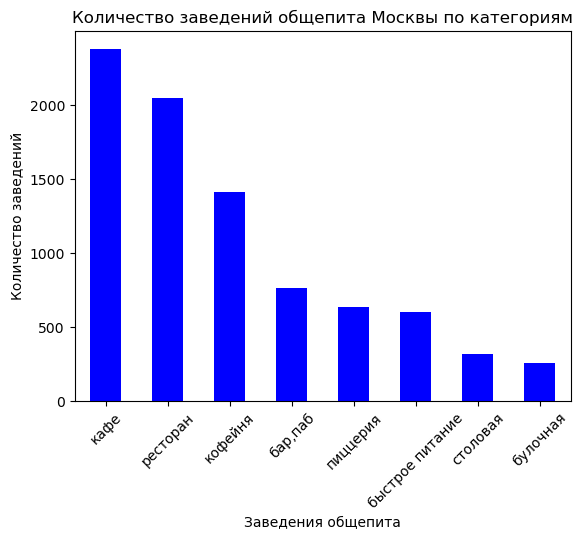

In [88]:
df_agg = df_made.groupby('category').agg({'id':'count'}) # Сделайте группировку по столбцу `category`

df_agg.sort_values(by='id', ascending=False).plot.bar(legend=False,
                title='Количество заведений общепита Москвы по категориям',
                ylabel='Количество заведений',
                xlabel='Заведения общепита',
                rot=45,
                color='blue')

# Отображаем график
plt.show()

In [89]:
#количество заведений в Москве в зависимости от категории
display(df_made.groupby('category')['id'].count().sort_values(ascending=False))

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64

Большое количеситво заведений относится к категории кафе и рестораны.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [92]:
#Администратинвеые округа в Москве
df_made['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

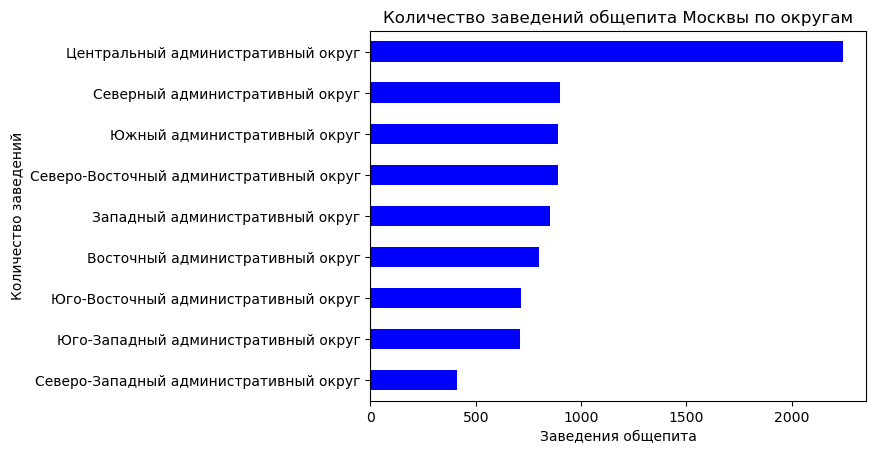

In [93]:
df_agg = df_made.groupby('district').agg({'id':'count'}) # Сделайте группировку по столбцу `district`

df_agg.sort_values(by='id', ascending=True).plot(kind='barh', legend=False,
                title='Количество заведений общепита Москвы по округам',
                ylabel='Количество заведений',
                xlabel='Заведения общепита',
                rot=0,
                color='blue')

# Отображаем график
plt.show()

In [94]:
#Количество заведений в Москве в зависимости от округа
display(df_made.groupby('district')['id'].count().sort_values(ascending=False))

district
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64

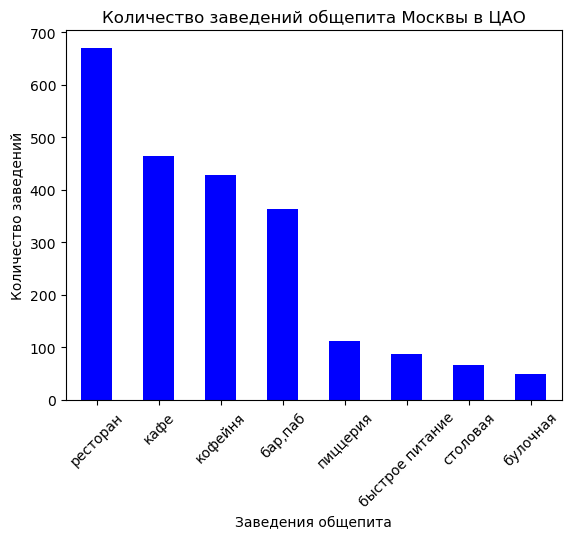

In [95]:
df_ct = df_made[df_made['district']=='Центральный административный округ'].groupby('category').agg({'id':'count'}) # Сделайте группировку по столбцу `category`

df_ct.sort_values(by='id',ascending=False).plot.bar(legend=False,
                title='Количество заведений общепита Москвы в ЦАО',
                ylabel='Количество заведений',
                xlabel='Заведения общепита',
                rot=45,
                color='blue')

# Отображаем график
plt.show()

In [96]:
df_cao=df_made[df_made['district']=='Центральный административный округ']
pd.DataFrame({'Percentage': round(100*df_cao.groupby('category').size() / len(df_cao),2)}).sort_values(by='Percentage', ascending=False)

,Percentage
category,
ресторан,29.88
кафе,20.70
кофейня,19.09
"бар,паб",16.24
пиццерия,5.04
быстрое питание,3.88
столовая,2.94
булочная,2.23


На рестораны, кафе и кофейни приходится практически 70% заведений в ЦАО

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

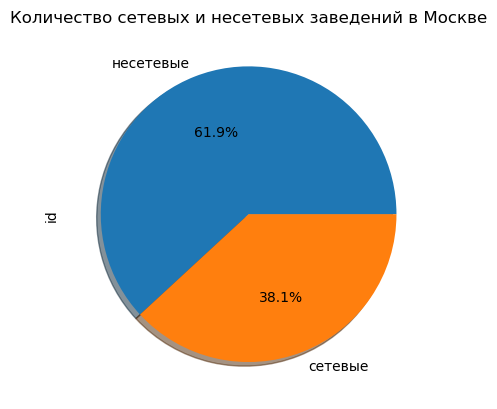

In [99]:
df_pie = df_made.groupby(['chain'])['id'].count()
plot = df_pie.plot.pie(y='Доля заведений', labels=['несетевые', 'сетевые'], title='Количество сетевых и несетевых заведений в Москве', legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

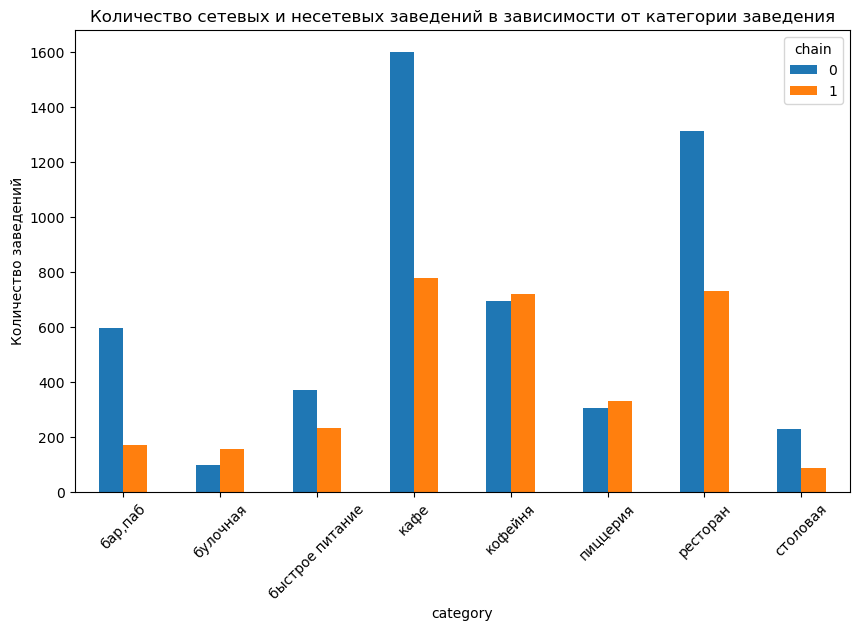

In [100]:
df_grouped = df_made.groupby(['category','chain'])['id'].count().unstack(fill_value=0) # Сгруппируйте данные и посчитайте среднюю зарплату

# Для визуализации df_grouped используйте метод plot(kind='bar'....)
# Строим линейчатую диаграмму
df_grouped.plot(kind='bar',
                title='Количество сетевых и несетевых заведений в зависимости от категории заведения',
                ylabel='Количество заведений',
                legend='chain',
                rot=45,
                figsize=(10,6))

# Отображаем график
plt.show()

In [101]:
trans=pd.pivot_table(df_made, values='id', index='category',
                       columns=['chain'], aggfunc="count")

In [102]:
# Группируем данные по категориям и типу сети
grouped = df_made.groupby(['category', 'chain']).size().reset_index(name='count')

# Рассчитываем доли в процентах
result = grouped.assign(percent=lambda x: round(x['count'] / x.groupby('category')['count'].transform('sum') * 100, 2))

# Отображаем результат
print(result)

           category  chain  count  percent
0           бар,паб      0    596    77.91
1           бар,паб      1    169    22.09
2          булочная      0     99    38.67
3          булочная      1    157    61.33
4   быстрое питание      0    371    61.53
5   быстрое питание      1    232    38.47
6              кафе      0   1599    67.24
7              кафе      1    779    32.76
8           кофейня      0    693    49.04
9           кофейня      1    720    50.96
10         пиццерия      0    303    47.87
11         пиццерия      1    330    52.13
12         ресторан      0   1313    64.27
13         ресторан      1    730    35.73
14         столовая      0    227    72.06
15         столовая      1     88    27.94


In [103]:
pd.pivot_table(result, index=["category"], values=["count", "percent"], columns=['chain'])

count        percent       
chain                 0      1       0      1
category                                     
бар,паб           596.0  169.0   77.91  22.09
булочная           99.0  157.0   38.67  61.33
быстрое питание   371.0  232.0   61.53  38.47
кафе             1599.0  779.0   67.24  32.76
кофейня           693.0  720.0   49.04  50.96
пиццерия          303.0  330.0   47.87  52.13
ресторан         1313.0  730.0   64.27  35.73
столовая          227.0   88.0   72.06  27.94

Большинство заведений относятся к типу несетевые, исключение составляют категории булочные, пиццерии и кофейни. В процентном отношении 61% сетевых заведений относится к несетевым булочным.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [106]:
#медиана количества заведений в Москве в зависимости от количества посадочных мест
display(pd.pivot_table(df_made[df_made.seats !=-1], values='seats', index='category',
                       aggfunc="median"))

,seats
category,
"бар,паб",82.5
булочная,50.0
быстрое питание,65.0
кафе,60.0
кофейня,80.0
пиццерия,55.0
ресторан,86.0
столовая,75.5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24736\2790510188.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'Распределение мест в столбце seats по категориям')

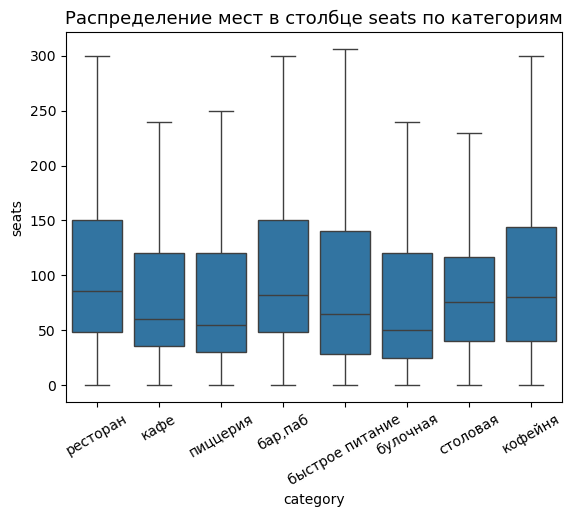

In [107]:
ax=sns.boxplot(data=df_made[df_made.seats !=-1], x="category", y="seats", showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# Подписываем и отображаем график
ax.set_title('Распределение мест в столбце seats по категориям', fontdict={'size': 13})

Наибольшлее количество посадочных мест по медиане в ресторанах, затем в бар-пабах и столовых. Это наиболее вместительные заведения.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

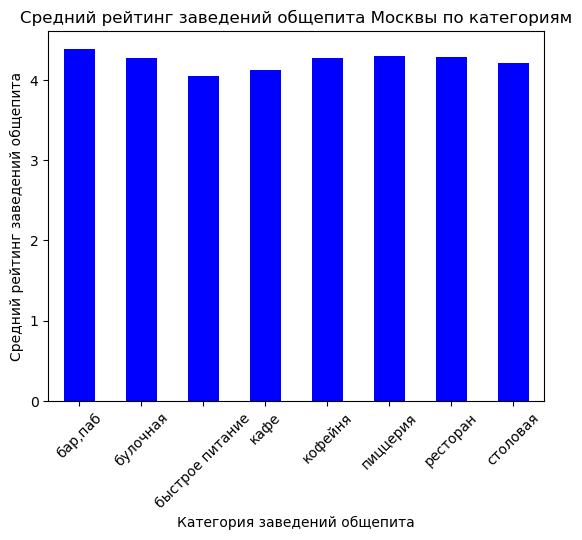

In [110]:
df_agg = df_made.groupby('category').agg({'rating':'mean'}) # Сделайте группировку по столбцу `category`

df_agg.plot.bar(legend=False,
                title='Средний рейтинг заведений общепита Москвы по категориям',
                ylabel='Средний рейтинг заведений общепита',
                xlabel='Категория заведений общепита',
                rot=45,
                color='blue')

# Отображаем график
plt.show()

In [111]:
display(df_made.groupby('category')['rating'].mean().sort_values(ascending=False))

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float64

Наиболее качественное обслуживание представлено в категории бары, пабы они заслужили наиболее щедрые оценки у пользователей затем идут пиццерии и рестораны.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [114]:
# Вычисляем матрицу корреляций с использованием phix
phik_corr = df_made[['rating', 'chain', 'seats','middle_avg_bill', 'middle_coffee_cup']].phik_matrix() 
display('Корреляционная матрица с коэффициентом phi_k')
display(phik_corr)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']


'Корреляционная матрица с коэффициентом phi_k'

,rating,chain,seats,middle_avg_bill,middle_coffee_cup
rating,1.000000,0.108092,0.000000,0.036080,0.020205
chain,0.108092,1.000000,0.055175,0.034473,0.026210
seats,0.000000,0.055175,1.000000,0.000000,0.000000
middle_avg_bill,0.036080,0.034473,0.000000,1.000000,0.000000
middle_coffee_cup,0.020205,0.026210,0.000000,0.000000,1.000000


interval columns not set, guessing: ['rating', 'chain', 'seats']


'Корреляционная матрица с коэффициентом phi_k'

,rating,chain,district,price,seats,is_24_7
rating,1.000000,0.108092,0.200691,0.281294,0.000000,0.150173
chain,0.108092,1.000000,0.064233,0.088850,0.055175,0.043414
district,0.200691,0.064233,1.000000,0.203078,0.276330,0.076392
price,0.281294,0.088850,0.203078,1.000000,0.045134,0.063602
seats,0.000000,0.055175,0.276330,0.045134,1.000000,0.032902
is_24_7,0.150173,0.043414,0.076392,0.063602,0.032902,1.000000


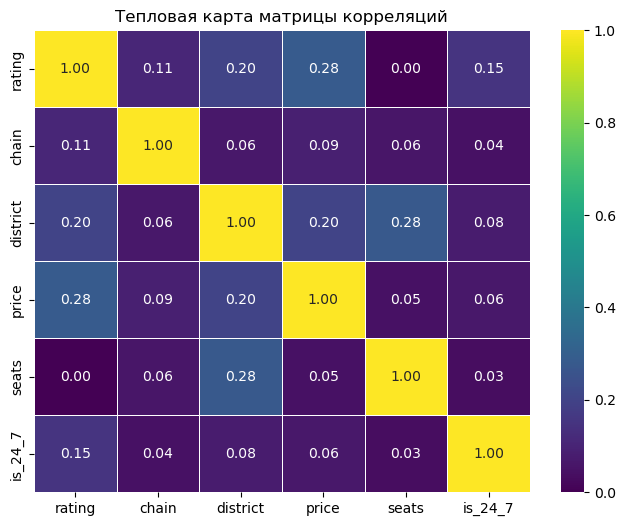

In [115]:
# Вычисляем матрицу корреляций с использованием phix
phik_corr = df_made[['rating', 'chain','district','price', 'seats','is_24_7']].phik_matrix() 
display('Корреляционная матрица с коэффициентом phi_k')
display(phik_corr)
# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=phik_corr, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций')
plt.show()

<Axes: title={'center': 'Анализ ценовой категории в зависимости от рейтинга заведегия'}, xlabel='price', ylabel='rating'>

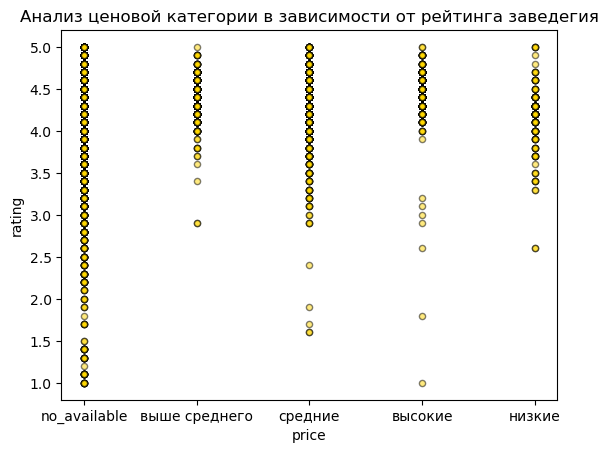

In [116]:
# Постройте диаграмму рассеяния для переменных 'price' и 'rating' по условиям
df_made.plot(kind='scatter',
          x='price',
          y='rating',
          alpha=0.5,
          color='gold',
          edgecolor='k',
          title='Анализ ценовой категории в зависимости от рейтинга заведегия')

Наибольшая корреляционная связь 0,28 обнаружена между ценой и рейтингом, округом и местами.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [119]:
grouped = df_made[df_made['chain']==1].groupby(['name', 'category']).agg({
    'id': 'count',
    'rating': 'mean'
})

# Переименовываем столбцы 
grouped = grouped.rename(columns={
    'id': 'count',
    'rating': 'avg_rating'
})
#в убывающем порядке
grouped = grouped.sort_values('count', ascending=False)

# Выбираем топ-15 заведений
top_15 = grouped.head(15)

# Выводим результат
display(top_15)

,,count,avg_rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


In [120]:
grouped = df_made[df_made['chain']==1].groupby('name').agg({
    'id': 'count',
    'rating': 'mean'
})

# Переименовываем столбцы 
grouped = grouped.rename(columns={
    'id': 'count',
    'rating': 'avg_rating'
})
#в убывающем порядке
grouped = grouped.sort_values('count', ascending=False)

# Выбираем топ-15 заведений
top_prime_15 = grouped.head(15)

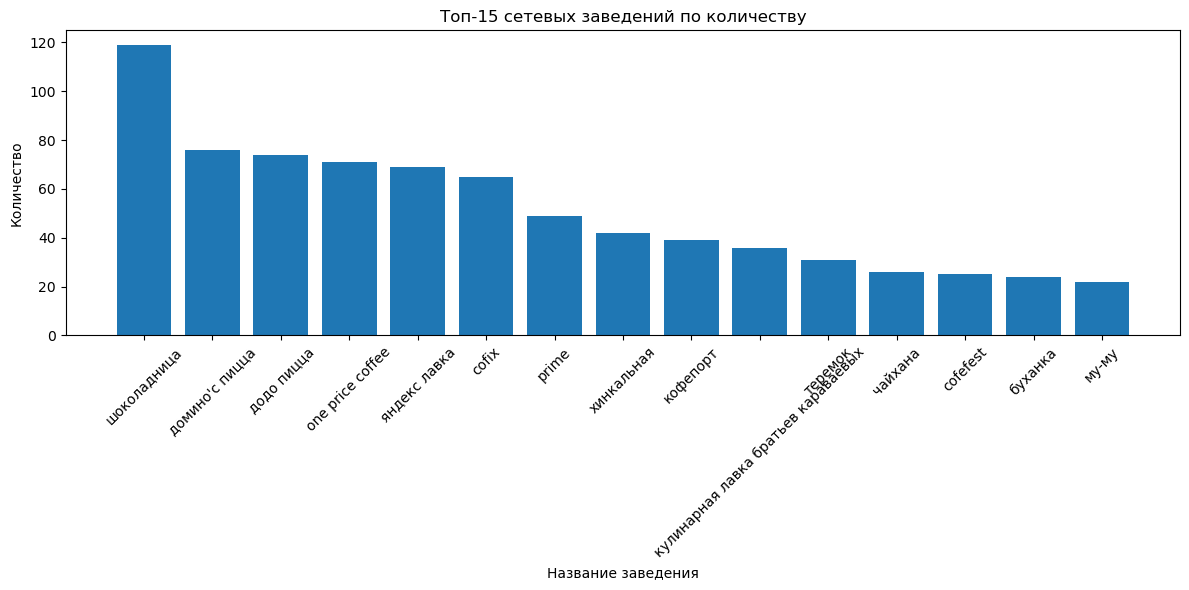

In [121]:
# Одной командой создаём область для рисунка и оси
fig, ax1 = plt.subplots(figsize=(12,6))

# Столбчатая диаграмма для количества заведений
ax1.bar(top_prime_15.index, top_15['count'])
ax1.set_title('Топ-15 сетевых заведений по количеству')
ax1.set_xlabel('Название заведения')
ax1.set_ylabel('Количество')
ax1.tick_params(axis='x', rotation=45)

# Настраиваем расположение подписей
plt.tight_layout()

# Показываем график
plt.show()

In [122]:
#топ-3 по кол-ву сетевых
top_15.sort_values(by='count', ascending=False).head(3)

,,count,avg_rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486


In [123]:
#топ-3 по рейтингу сетевых
top_15.sort_values(by='avg_rating', ascending=False).head(3)

,,count,avg_rating
name,category,,
кофемания,кофейня,22,4.463636
буханка,булочная,25,4.416000
кулинарная лавка братьев караваевых,кафе,39,4.394872


In [124]:
#топ-3 по категории заведений сетевых
top_15.sort_values(['category','avg_rating'],ascending=False).groupby('category').head(3)

,,count,avg_rating
name,category,,
prime,ресторан,49,4.114286
теремок,ресторан,36,4.105556
яндекс лавка,ресторан,69,3.872464
додо пицца,пиццерия,74,4.286486
домино'с пицца,пиццерия,76,4.169737
кофемания,кофейня,22,4.463636
шоколадница,кофейня,119,4.178151
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [126]:
df_made['middle_avg_bill']=df_made.middle_avg_bill.astype('int64')

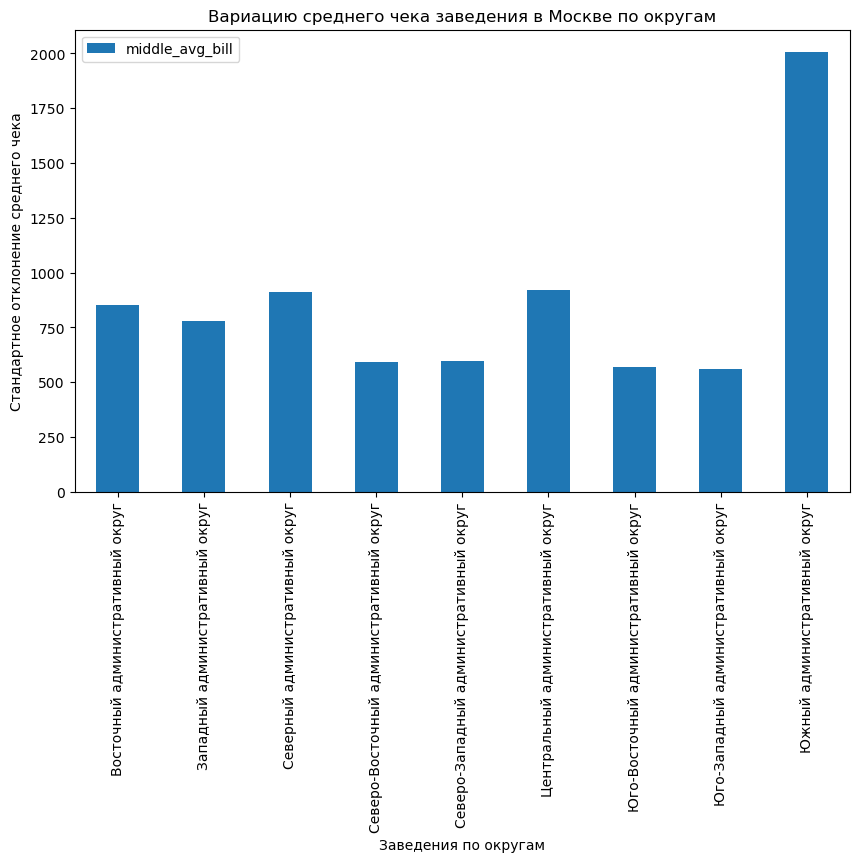

In [127]:
df_grouped1 = df_made[df_made['middle_avg_bill']!=-1].groupby('district').agg({'middle_avg_bill':'std'}) 
df_grouped1.plot(kind='bar',
                title='Вариацию среднего чека заведения в Москве по округам',
                xlabel='Заведения по округам',
                ylabel='Стандартное отклонение среднего чека',
                rot=90,
                figsize=(10,6))

# Отображаем график
plt.show()

In [128]:
display(df_grouped1)

,middle_avg_bill
district,
Восточный административный округ,850.903310
Западный административный округ,779.008536
Северный административный округ,912.609221
Северо-Восточный административный округ,591.232153
Северо-Западный административный округ,595.055218
Центральный административный округ,920.014707
Юго-Восточный административный округ,566.825663
Юго-Западный административный округ,559.173122
Южный административный округ,2008.640596


Наибольшая вариация характерна для чеков заведений расположенных в южном административном округе, в остальных округах она меняется от 559 до 850 рублей.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [131]:
df_made['middle_avg_bill']=df_made.middle_coffee_cup.astype('int64')
display(pd.pivot_table(df_made[df_made['middle_coffee_cup'] !=-1], values='middle_coffee_cup', index='district', aggfunc="mean"))

,middle_coffee_cup
district,
Восточный административный округ,174.023810
Западный административный округ,189.640000
Северный административный округ,165.090909
Северо-Восточный административный округ,165.333333
Северо-Западный административный округ,160.458333
Центральный административный округ,188.210843
Юго-Восточный административный округ,150.771429
Юго-Западный административный округ,183.485714
Южный административный округ,157.826087


In [132]:
display(pd.pivot_table(df_made[df_made['middle_coffee_cup'] !=-1], values='middle_coffee_cup', index='category', aggfunc=('mean', 'count')))

,count,mean
category,,
"бар,паб",6,208.333333
быстрое питание,1,140.000000
кафе,4,105.500000
кофейня,521,175.055662
пиццерия,3,153.333333


Наибольшая средняя цена кофе в ЗАО, по категориям заведений большая часть заказов была совершена в кофейнях, что выглядит логично, по остальным категориям заведений далеко идущих выводов не сделаешь.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Большинство заведений общепита Москвы относятся к категориям кафе и рестораны.
Наибольшее количество заведений 2242 расположены в ЦАО, в котором 670 ресторанов и 464 кафе.
Большая часть заведений относятся к несетевым заведениям. При этом этом кофейни и пиццерии в большинстве своем это сетевые заведения.
Медиана ресторана по количеству посадочных мест составляет 86.
Наибольший рейтинг одобрения имеют пабы 4,38 и пицерии 4,3.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

**Балы проделана подготовительная работа**: 
- подгружены данные 
- объединен датасет 
- заполнены пропуски
- удалены дубликаты
- заполен столбец 24/7

**Проведен исследовательский анализ полученного датасета**:
- 52.5% заведений в Москве относятся к категории кафе и рестораны
- 26,7% заведений находятся в ЦАО это самый популярный округ для такого рода мест
- 38,1% заведений относятся к сетевому типу это достаточно популярный формат особенно среди пиццерией и кофеен
- по количеству посадочных мест наиболее востребованным форматом является ресторан и паб
- топ-3 по категориям заведений в среднем бар,паб 4.39, пиццерия 4.3, ресторан 4.29
- наиболее сильная корреляция обнаружена цены-район и рейтинг-цены
- самый дорогой кофе можно выпить в пабе, а затем в кофейни


**Рекомендации**:
- Наиболее востребованным округом по среднему размеру чека является ЗАО 189,64 рубля.
- Наиболее востребованными по категорям являются кафе и рестораны. В них в среднем больше посадочных мест и от общего объема выборки по категориям. 86 мест в среднем в ресторане и 60 в кафе. 29,88% заведений в выборкеэто рестораны, 20,7% это кафе, 19,09% это кофейни
- 38,1% заведений относятся к сетевым, среди заведений по категориям наименьшая доля сетевых заведений в барах и пабах 22,09%. Чеки в сетевых и несетевых заведениях примерно равны, но чуть меньше в сетевых.
- Несколько выше средний чек в заведениях, работающих 24/7 225,73 против 173,25 с другим графиком, но при этом у таких заведений очевидно и затраты выше.
- Если мы смортим на форматы, то кафе и заведения быстрого питания имеют несколько меньше посадочных мест, чем рестораны, кофейни и пабы.
- В соответствии с корреляционной матрицей есть связь 0,2 района с ценовой категорией заведения, ниже построили таблицу этого по величине среднего чека и категории заведения.

Стоит присмотреться к формату паба, бара, с ценовой категорией выше среднего, который в последствии сможет дорасти до сети таких заведений, начав с заведения в ЗАО в формате 24/7, так как чек у таких заведений выше.
Сетевой формат в данном сегменте не так распостранен, необходимо в соответствии с рейтингами иметь высокий формат обслуживания в данной категории заведений. 
Что в дальнейшем может быть востребован среди населения. Мне кажется что при достаточных инвестициях распостранить эту модель на весь регион.   

In [140]:
#сводная таблица округа на ценовую категорию по размеру среднего чека, брались зведения с имеющимся средним чеком
display(pd.pivot_table(df_made[(df_made['middle_avg_bill']!=-1)], values='middle_avg_bill', columns='price', index='district', aggfunc="mean", fill_value='нет информации'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24736\749222482.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  display(pd.pivot_table(df_made[(df_made['middle_avg_bill']!=-1)], values='middle_avg_bill', columns='price', index='district', aggfunc="mean", fill_value='нет информации'))


price,no_available,высокие,выше среднего,низкие,средние
district,,,,,
Восточный административный округ,133.222222,нет информации,нет информации,123.222222,253.466667
Западный административный округ,156.500000,нет информации,256.0,163.750000,222.956522
Северный административный округ,147.181818,нет информации,нет информации,159.000000,195.629630
Северо-Восточный административный округ,158.571429,нет информации,нет информации,129.090909,193.333333
Северо-Западный административный округ,134.769231,нет информации,150.0,195.000000,194.888889
Центральный административный округ,162.857143,250.0,нет информации,121.928571,220.814815
Юго-Восточный административный округ,143.875000,нет информации,нет информации,144.833333,162.000000
Юго-Западный административный округ,168.764706,нет информации,нет информации,125.000000,206.437500
Южный административный округ,148.379310,нет информации,нет информации,157.000000,179.153846


In [141]:
#сводная таблица категории на ценовую категорию по размеру среднего чека, брались зведения с имеющимся средним чеком
display(pd.pivot_table(df_made[(df_made['middle_avg_bill']!=-1)], values='middle_avg_bill', columns='price', index='category', aggfunc="mean", fill_value='нет информации'))

price,no_available,высокие,выше среднего,низкие,средние
category,,,,,
"бар,паб",нет информации,250.0,нет информации,нет информации,200.0
быстрое питание,140.0,нет информации,нет информации,нет информации,нет информации
кафе,105.5,нет информации,нет информации,нет информации,нет информации
кофейня,154.051587,нет информации,256.0,136.614035,210.14218
пиццерия,нет информации,нет информации,150.0,нет информации,155.0
